(70, 70)
20.0
1.1304347826086958


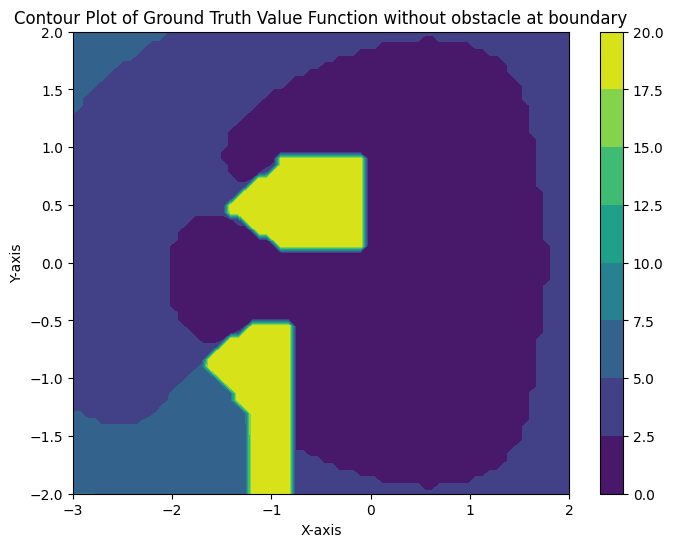

In [61]:
import scipy.io as spio
import numpy as np
import matplotlib.pyplot as plt

true_data = spio.loadmat('GT_vfunc.mat')
print(true_data['data_vfunc'][15:85, 15:85, 40].shape)
data = true_data['data_vfunc'][15:85, 15:85, 40]
# Z = np.flipud(data)
# Z = np.fliplr(Z)<=0.0
Z = data #<=0.0
Z = Z.T
#Z = np.where(Z == 20, 7.2, Z)
#print(Z)
# true_count = np.sum(Z)
# print(true_count)
#print(true_data['data'][:, :, 6][:, 100])
# Define the range for x and y coordinates
x_min, x_max = -3, 2
y_min, y_max = -2, 2
print(np.max(Z))
print(np.min(Z))

# Number of points in each dimension
num_points = 70 #198

# Create vectors of x and y values
x = np.linspace(x_min, x_max, num_points)
y = np.linspace(y_min, y_max, num_points)

# Create a 2D grid of x and y values
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(8, 6))

# Create a contour plot
contour = plt.contourf(X, Y, Z, cmap='viridis')

# Add a color bar for reference
plt.colorbar(contour)

# Labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Contour Plot of Ground Truth Value Function without obstacle at boundary')

plt.show()

(70, 70, 41)
[ 0.27922313 -0.53618304] -2.63768115942029 0.7826086956521738 3.8695652173913047
[6, 47, 15]
[ 0.32299209 -0.6293537 ] -2.5652173913043477 0.7246376811594204 3.5652173913043477
[7, 46, 14]
[ 0.42864234 -0.60998353] -2.4927536231884058 0.6666666666666665 3.2608695652173916
[8, 45, 13]
[ 0.56200554 -0.58573794] -2.420289855072464 0.6086956521739131 2.956521739130435
[9, 45, 12]
[ 0.72659753 -0.58505984] -2.3478260869565215 0.6086956521739131 2.6521739130434785
[10, 45, 11]
[ 0.89611042 -0.59557086] -2.2753623188405796 0.6086956521739131 2.347826086956522
[11, 45, 10]
[ 1.04006577 -0.60350765] -2.2028985507246377 0.6086956521739131 2.0434782608695654
[13, 45, 9]
[ 1.05250772 -0.58974202] -2.0579710144927534 0.6086956521739131 1.7391304347826089
[15, 45, 8]
[ 1.04417211 -0.56802739] -1.9130434782608696 0.6086956521739131 1.4347826086956523
[17, 45, 7]
[ 1.02047339 -0.54597712] -1.7681159420289854 0.6086956521739131 1.1304347826086958
[19, 45, 6]
[ 0.9862839  -0.52624098] -1.6

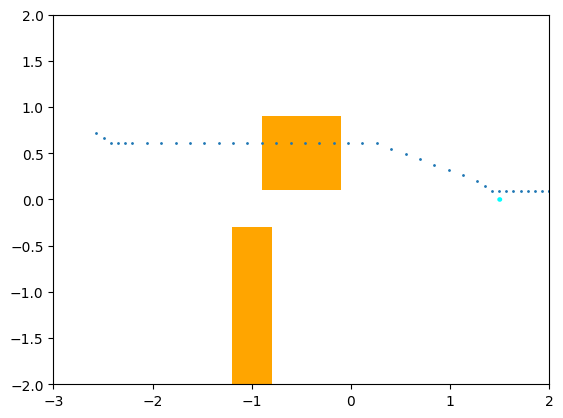

In [76]:
import scipy.io as spio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, Ellipse

deriv_true_data = spio.loadmat('vfunc_deriv.mat')
print(deriv_true_data['deriv_vfunc_aux'][2][0][15:85, 15:85, 0, :].shape)
deriv_data_x = deriv_true_data['deriv_vfunc_aux'][0][0][15:85, 15:85, :, :]
deriv_data_y = deriv_true_data['deriv_vfunc_aux'][1][0][15:85, 15:85, :, :]
deriv_data_z = deriv_true_data['deriv_vfunc_aux'][2][0][15:85, 15:85, 0, :]
# Z = np.flipud(data)
# Z = np.fliplr(Z)<=0.0

#Z = np.where(Z == 20, 7.2, Z)
#print(Z)
# true_count = np.sum(Z)
# print(true_count)
#print(true_data['data'][:, :, 6][:, 100])
# Define the range for x and y coordinates
x_min, x_max = -3, 2
y_min, y_max = -2, 2
# print(np.max(Z))
# print(np.min(Z))

# Number of points in each dimension
num_points = 70 #198

# Create vectors of x and y values
x = np.linspace(x_min, x_max, num_points)
y = np.linspace(y_min, y_max, num_points)
z = np.linspace(-1, 20, num_points)
time = np.linspace(0, 2, 41)


# state = [x[0], y[3]]
del_x = 5/70
del_y = 4/70
del_z = 0.3
z_idx = int(np.floor((data[5,48]+1)/del_z))
state_idx = [5, 48, z_idx]


def dynamics(u, state_idx):
    next_state = np.zeros(3)
    state = [x[state_idx[0]], y[state_idx[1]], z[state_idx[2]]]
    
    next_state[0] = time[1]*(u[0] + 2 - 0.5*state[1]**2)+state[0]
    next_state[1] = time[1]*u[1] + state[1]
    next_state[2] = -time[1]*(np.linalg.norm(state[0:2]-np.array([1.5,0]))) + state[2]

    next_state_idx = []
    next_state_idx.append(int(np.floor((next_state[0]+3)/del_x)))
    next_state_idx.append(int(np.floor((next_state[1]+2)/del_y)))
    z_idx = int(np.floor((next_state[2]+1)/del_z))
    if z_idx < 0:
        z_idx = 0
    next_state_idx.append(z_idx)
    
    return next_state_idx

x_list = []
y_list = []

for i in range(len(time)):
    u = np.zeros(2)
    u[0] = -deriv_data_x[state_idx[0], state_idx[1], state_idx[2], 40-i]
    u[1] = -deriv_data_y[state_idx[0], state_idx[1], state_idx[2], 40-i]
    print(u, x[state_idx[0]], y[state_idx[1]], z[state_idx[2]])
    norm = np.linalg.norm(u) + 1e-6
    u[0] = u[0]/norm
    u[1] = u[1]/norm
    state_idx = dynamics(u, state_idx)
    print(state_idx)
    if state_idx[0]>=70:
        state_idx[0] =69
    if state_idx[1]>=70:
        state_idx[1] =69
    x_list.append(x[state_idx[0]])
    y_list.append(y[state_idx[1]])

plt.xlim(-3, 2)
plt.ylim(-2, 2)
currentAxis1 = plt.gca()
currentAxis1.add_patch(Rectangle((-0.9, 0.1), 0.8, 0.8, facecolor = 'orange', alpha=1))
currentAxis2 = plt.gca()
currentAxis2.add_patch(Rectangle((-1.2, -2.3), 0.4, 2, facecolor = 'orange', alpha=1))
currentAxis3 = plt.gca()
currentAxis3.add_patch(Circle((1.5, 0), 0.025, facecolor = 'cyan', alpha=1))
plt.scatter(x_list, y_list, s=1)
plt.savefig("traj_plot.png",dpi=1200)    
plt.show()    

[[9.25148296 9.25148296 9.25148296 ... 3.95483255 4.02545452 4.09607649]
 [9.03961754 9.03961754 9.03961754 ... 3.95483255 4.02545452 4.09607649]
 [8.75712967 8.75712967 8.82775116 ... 3.95483255 4.02545452 4.09607649]
 ...
 [7.55655479 7.41531086 7.20344543 ... 3.95483255 4.02545452 4.09607649]
 [7.76842117 7.62717724 7.48593283 ... 3.95483255 4.02545452 4.09607649]
 [8.05090904 7.83904314 7.69779921 ... 3.95483255 4.02545452 4.09607649]]
20.0
1.6949282884597778


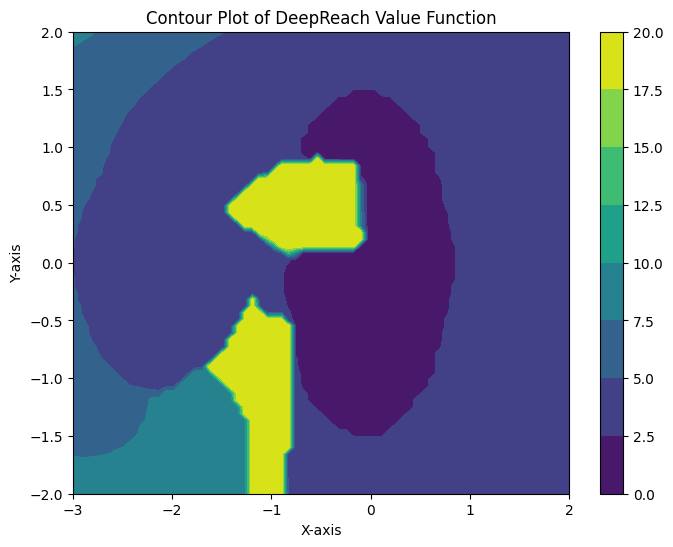

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Replace 'your_file.csv' with the path to your CSV file
data = pd.read_csv('dataset_ebc.csv')
value = data['Z']
value = np.array(value)
value = value.reshape(70,70)
value = value.T
#value = np.where(value >= 7.2, 7.2, value)

# Display the first few rows of the dataset
print(value)

x_min, x_max = -3, 2
y_min, y_max = -2, 2

# Number of points in each dimension
num_points = 70 #198
print(np.max(value))
print(np.min(value))

# Create vectors of x and y values
x = np.linspace(x_min, x_max, num_points)
y = np.linspace(y_min, y_max, num_points)

# Create a 2D grid of x and y values
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(8, 6))

# Create a contour plot
contour = plt.contourf(X, Y, value, cmap='viridis')

# Add a color bar for reference
plt.colorbar(contour)

# Labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Contour Plot of DeepReach Value Function')

plt.show()

329.9246351786124
0.0


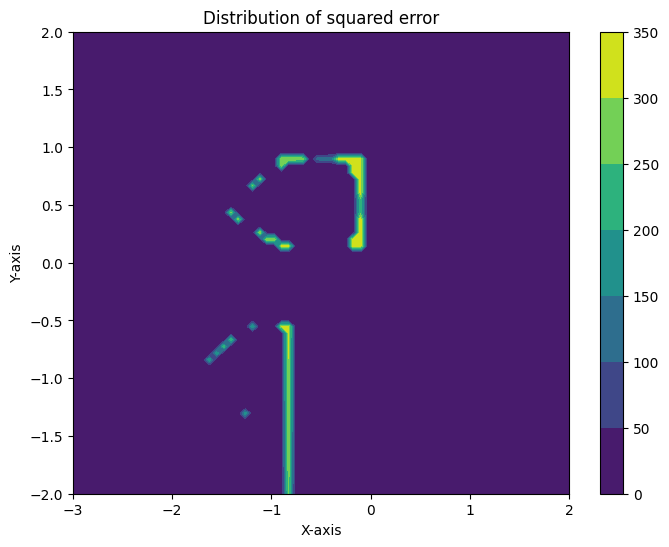

Mean Squared Error: 5.777954356207598


In [ ]:
error = (Z - value) ** 2
x_min, x_max = -3, 2
y_min, y_max = -2, 2
#error = np.where(error > 50, 50, error)

# Number of points in each dimension
num_points = 70 #198
print(np.max(error))
print(np.min(error))

# Create vectors of x and y values
x = np.linspace(x_min, x_max, num_points)
y = np.linspace(y_min, y_max, num_points)

# Create a 2D grid of x and y values
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(8, 6))

# Create a contour plot
contour = plt.contourf(X, Y, error, cmap='viridis')

# Add a color bar for reference
plt.colorbar(contour)

# Labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Distribution of squared error')

plt.show()

mse = np.mean(error)
print(f"Mean Squared Error: {mse}")

In [ ]:
flag1 = np.full((70, 70), False, dtype=bool)
flag2 = np.full((70, 70), False, dtype=bool)
x_min, x_max = -3, 2
y_min, y_max = -2, 2
flag1 = np.where(Z == 20.0, True, flag1)
flag2 = np.where(value == 20.0, True, flag2)
print(np.sum(np.logical_and(flag1,flag2)))
print(np.sum(flag1))

# # Number of points in each dimension
# num_points = 70 #198
# print(np.max(error))
# print(np.min(error))

# # Create vectors of x and y values
# x = np.linspace(x_min, x_max, num_points)
# y = np.linspace(y_min, y_max, num_points)

# # Create a 2D grid of x and y values
# X, Y = np.meshgrid(x, y)

# plt.figure(figsize=(8, 6))

# # Create a contour plot
# contour = plt.contourf(X, Y, error, cmap='viridis')

# # Add a color bar for reference
# plt.colorbar(contour)

# # Labels and title
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.title('Contour Plot of Value Function')

# plt.show()

# mse = np.mean((Z - value) ** 2)
# print(f"Mean Squared Error: {mse}")

381
414
